In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, accuracy_score,make_scorer,auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

import warnings 
warnings.filterwarnings("ignore")

## Importing the data

In [19]:
df = pd.read_csv('creditcard.csv')

## Data Exploration


In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


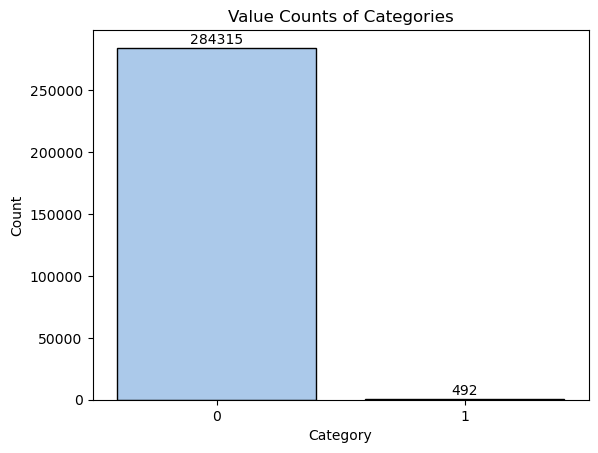

In [22]:
ax = sns.countplot(x='Class', data=df, palette='pastel', edgecolor='black')
# plt.figure(figsize=(6, 4))
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.title('Value Counts of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [23]:
# what does the DF looks like
df.shape   

(284807, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
df.describe(include='all').T # contains count, mean, std, min, 25%, 50%, 75%, max of the columns

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [26]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

Checking Outliers

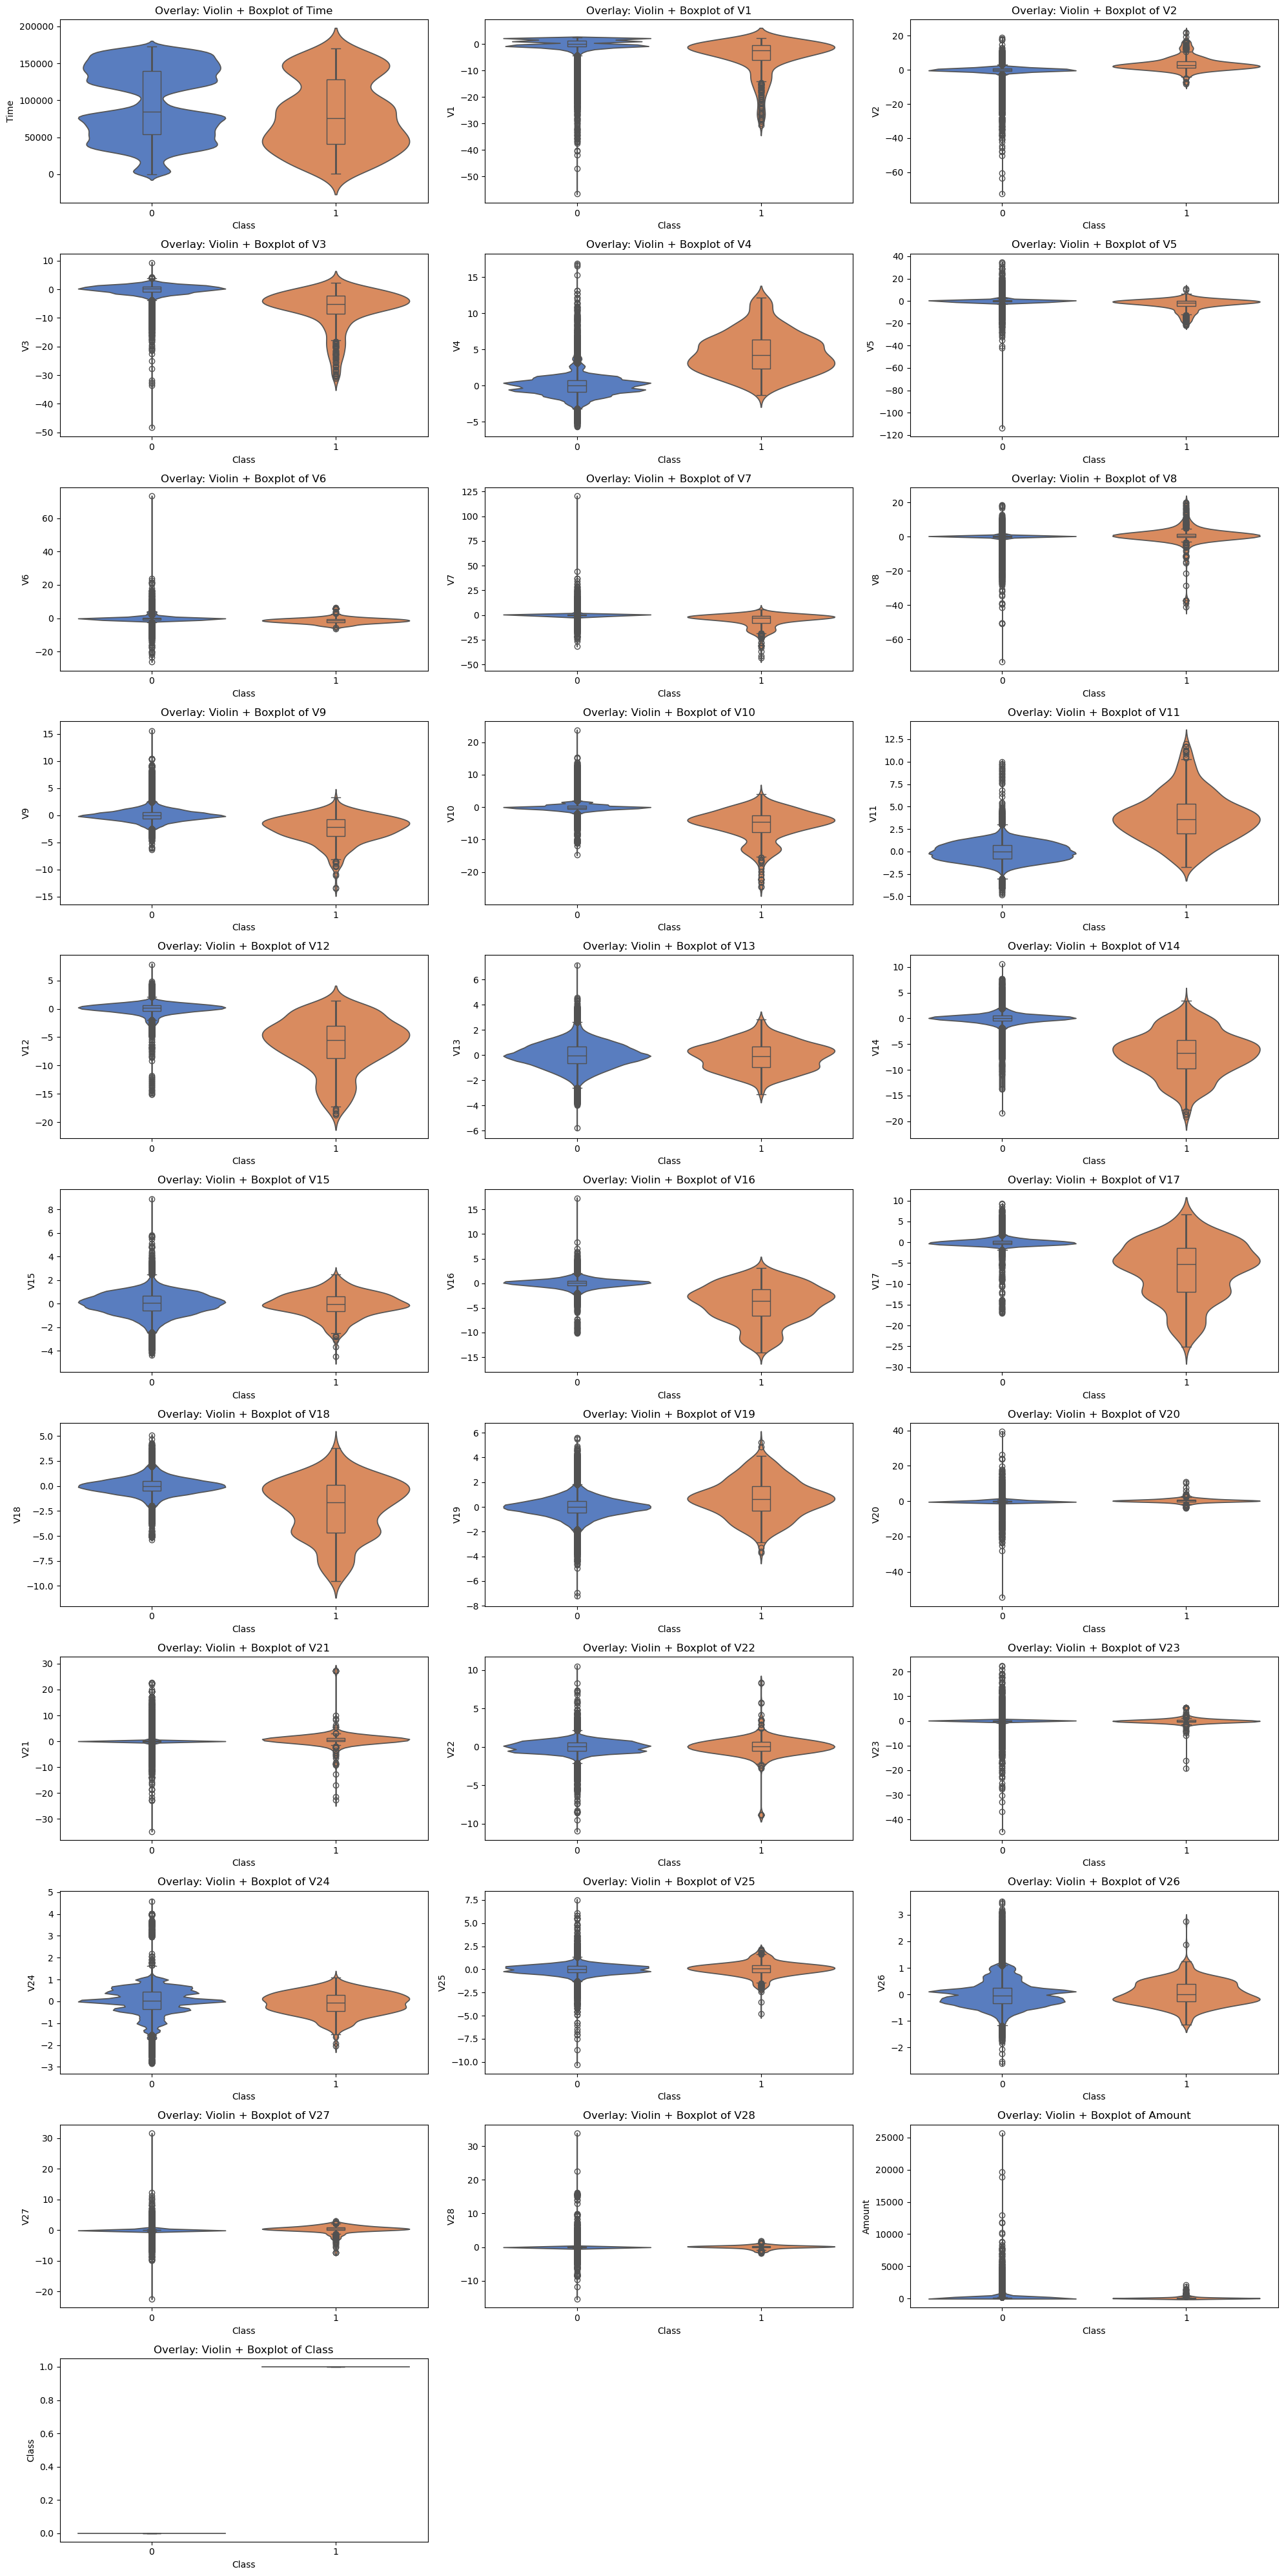

In [27]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplot & Violinplot overlay
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    # Violin plot with KDE shape only (no internal box)
    sns.violinplot(data=df, x='Class', y=col, palette='muted', inner=None, ax=ax)
    # Overlay boxplot on top of violin
    sns.boxplot(data=df, x='Class', y=col, width=0.1, showcaps=True, boxprops={'facecolor':'none', "zorder": 2},
                showfliers=True, whiskerprops={'linewidth':2}, ax=ax)
    
    ax.set_title(f'Overlay: Violin + Boxplot of {col}')

# Remove any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
# checking the target class
class_counts = df['Class'].value_counts().to_frame()
class_counts['percent'] = (class_counts['count']/class_counts['count'].sum()*100).round(2)
print(class_counts)


        count  percent
Class                 
0      284315    99.83
1         492     0.17


## Data Preprocessing

In [29]:
# Train test split 
x = df.drop("Class", axis=1)
y = df['Class']

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Resampling with SMOTE 
smote = SMOTE(random_state=42)
x_res , y_res = smote.fit_resample(x_train, y_train)

## Modelling

1. XGB Classifier with SMOTE

In [30]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}



random_search = RandomizedSearchCV(estimator=xgb, scoring='roc_auc',
                                   param_distributions=param_dist,n_iter=20, cv=3, 
                                   verbose=1,random_state=42,n_jobs=-1)
random_search.fit(x_res, y_res)

best_xgb = random_search.best_estimator_
best_xgb_roc_auc = roc_auc_score(y_test,best_xgb.predict_proba(x_test)[:,1])
print('Best Parameters are: ',best_xgb.get_params())
print('Best Score: ',best_xgb_roc_auc)

print('Classification report:\n',classification_report(y_test, best_xgb.predict(x_test)))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters are:  {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.6, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}

2. XGBoost with `scale_pos_wright` specified

In [35]:
pos_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])

# small test 
xgb_test = XGBClassifier(
    subsample=0.6,
    reg_lambda=1.5,
    reg_alpha=0.01,
    scale_pos_weight = pos_weight,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.1,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_test.fit(x_train,y_train)
print("Classification report of Test XGB:\n", classification_report(y_test,xgb_test.predict(x_test)))
print("ROC_AUC score of test XGB:", roc_auc_score(y_test,xgb_test.predict_proba(x_test)[:,1]))


Classification report of Test XGB:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.23      0.90      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.68     56962
weighted avg       1.00      0.99      1.00     56962

ROC_AUC score of test XGB: 0.9834153167457191


3. Isolation Forest

In [32]:
iso = IsolationForest(random_state=42)

# Define parameter grid
param_grid_iso = {
    'n_estimators': [100, 200],
    'max_samples': [0.6, 0.8, 1.0],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [0.6, 0.8, 1.0],
    'bootstrap': [False, True]
}

def isolation_forest_roc_auc(estimator, X, y_true):
    # decision_function returns anomaly scores (the higher, the more normal)
    # We multiply by -1 to treat anomalies (fraud) as high-score
    scores = -estimator.decision_function(X)
    return roc_auc_score(y_true, scores)

roc_auc_scorer = make_scorer(isolation_forest_roc_auc, needs_proba=False)

random_search_iso = RandomizedSearchCV(
    estimator=iso,
    param_distributions=param_grid_iso,
    n_iter=20,                # Try 20 random combinations
    scoring=roc_auc_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_iso.fit(x_train, y_train)
best_iso = random_search_iso.best_estimator_
best_iso_roc_auc = roc_auc_score(y_test, -best_iso.decision_function(x_test))

print('Best Parameters are: ',best_iso.get_params())
print('Best Score - Isolation forest: ',best_iso_roc_auc)


print(classification_report(y_test,(best_iso.predict(x_test) == -1).astype(int)))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters are:  {'bootstrap': True, 'contamination': 0.05, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 200, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best Score - Isolation forest:  0.9603746640749715
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.89      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.95      0.97     56962



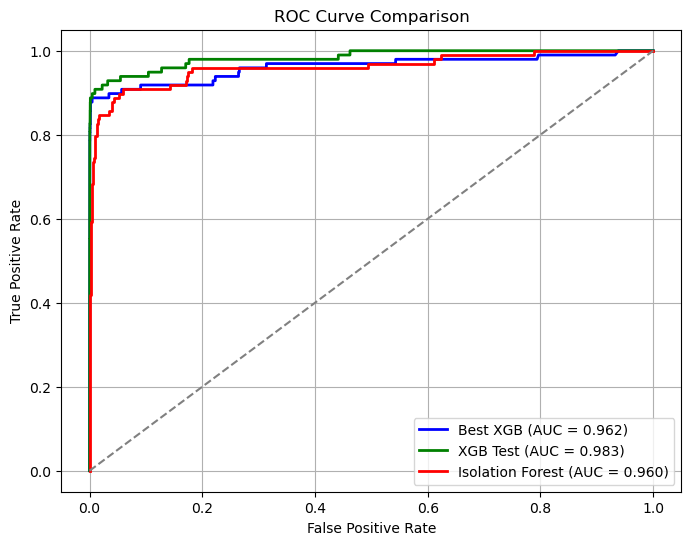

In [34]:
y_prob_best_xgb = best_xgb.predict_proba(x_test)[:, 1]
y_prob_xgb_test = xgb_test.predict_proba(x_test)[:, 1]


y_score_iso = -best_iso.decision_function(x_test)

fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best_xgb)
roc_auc_best = auc(fpr_best, tpr_best)

fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_xgb_test)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_iso, tpr_iso, _ = roc_curve(y_test, y_score_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)


plt.figure(figsize=(8,6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'Best XGB (AUC = {roc_auc_best:.3f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'XGB Test (AUC = {roc_auc_test:.3f})')
plt.plot(fpr_iso, tpr_iso, color='red', lw=2, label=f'Isolation Forest (AUC = {roc_auc_iso:.3f})')

# Add the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Saving best Model

The model with best ROC-AUC and best Recall (important since this is a fraud detection problem) is xgb_test

In [17]:
import joblib
joblib.dump(xgb_test, "best_model.pkl")
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl
